# Poisson Distribution:

-   estimates how many times an event can happen in a specified time. eg: if someone eats twice a day what is the probability he will eat thrice? 
-   you can use this to generate random numbers that will have a certain mean. 
-   if something happens 4 times, chance of it happening 0 is low etc
-   wikipedia-w3schools
-   stats
-   lambda random generator. 
-   documentation

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Generating Data:

Lets say you want to generate synthetic data of the number of new visitors to an emergency department over time based on the mean number of visitors for that we would need to
-   create the date range
-   create the random data based on the poisson distribution

In [2]:
# series of ranges. look at doc's for more info

pd.date_range(start='1/1/2018', end='1/08/2018') 

# watch out for american dates. dont give dates in year month day format. 

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [3]:
pd.date_range(start='2023-01-01', end='2023-01-04') # freq = 'D'  daily

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04'], dtype='datetime64[ns]', freq='D')

In [4]:
pd.date_range(start='2023-01-01', end='2023-01-04', freq='H ') # every hour

C:\Users\louis\AppData\Local\Temp\ipykernel_4844\2086484921.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(start='2023-01-01', end='2023-01-04', freq='H ') # every hour


DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00', '2023-01-01 05:00:00',
               '2023-01-01 06:00:00', '2023-01-01 07:00:00',
               '2023-01-01 08:00:00', '2023-01-01 09:00:00',
               '2023-01-01 10:00:00', '2023-01-01 11:00:00',
               '2023-01-01 12:00:00', '2023-01-01 13:00:00',
               '2023-01-01 14:00:00', '2023-01-01 15:00:00',
               '2023-01-01 16:00:00', '2023-01-01 17:00:00',
               '2023-01-01 18:00:00', '2023-01-01 19:00:00',
               '2023-01-01 20:00:00', '2023-01-01 21:00:00',
               '2023-01-01 22:00:00', '2023-01-01 23:00:00',
               '2023-01-02 00:00:00', '2023-01-02 01:00:00',
               '2023-01-02 02:00:00', '2023-01-02 03:00:00',
               '2023-01-02 04:00:00', '2023-01-02 05:00:00',
               '2023-01-02 06:00:00', '2023-01-02 07:00:00',
               '2023-01-

Lets store this in a variable that i will make the index of my dataFrame. 

In [5]:
idx = pd.date_range(start='2023-01-01', end='2023-01-04', freq='H') # 5 hours

C:\Users\louis\AppData\Local\Temp\ipykernel_4844\678640603.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  idx = pd.date_range(start='2023-01-01', end='2023-01-04', freq='H') # 5 hours


Lets generate some random data (the same length of the index)

In [6]:
rng=np.random.default_rng()

In [7]:
df = pd.DataFrame(index=idx, data=rng.random(len(idx)), columns=['admissions'])
df.head()

,admissions
2023-01-01 00:00:00,0.597424
2023-01-01 01:00:00,0.258518
2023-01-01 02:00:00,0.050432
2023-01-01 03:00:00,0.318871
2023-01-01 04:00:00,0.816087


ok so that does not look like proper data ^^^. (hard to treat 0.3 of a person), so we need a discrete set of random numbers that match a mean....so we use the **Poisson Distribution**

In [8]:
mean_admissions = 15 # 15 admissions per hour

`poisson(lam=mean_admissions, size=len(idx)` 
-   lambda-->the mean
-   size = number to return
- store into a column called admissions

In [9]:
df=pd.DataFrame(index=idx, data=rng.poisson(lam=mean_admissions, size=len(idx)), columns=['admissions'])
df.head()

,admissions
2023-01-01 00:00:00,11
2023-01-01 01:00:00,11
2023-01-01 02:00:00,16
2023-01-01 03:00:00,14
2023-01-01 04:00:00,16


<Axes: xlabel='None', ylabel='admissions'>

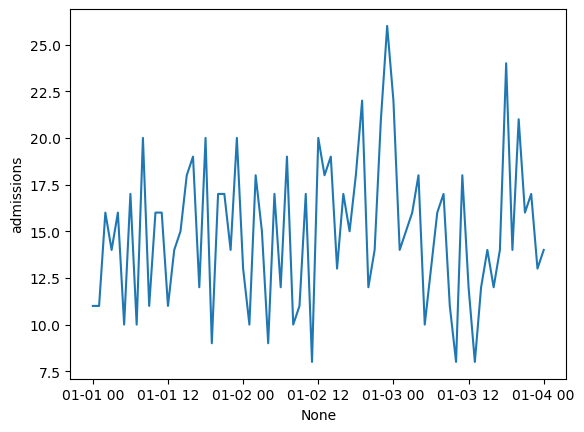

In [10]:
import seaborn as sns

sns.lineplot(data=df, x = df.index, y='admissions')

In [11]:
df['admissions'].mean()

# mean is different each time, if you wanted it to be the same you would use seed

15.027397260273972

This does not take into account the time of day. We can pass an array into lam to reflect the changing averages throughout the day.
-   do it based on a sin wave

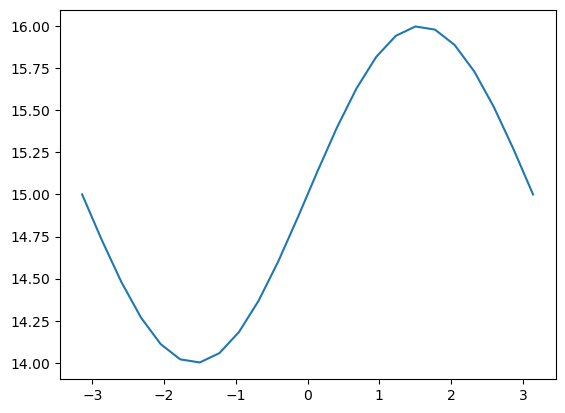

In [12]:
x = np.linspace(-np.pi, np.pi, 24) # 24 hours
means = np.sin(x) +15   # 15 admissions per hour + sin wave. A sin wave is a good way to model daily admissions
import matplotlib.pylab as plt
plt.plot(x, means)

# mean will change up and down depending on the time of day. 

In [13]:
df = pd.DataFrame(index=idx, data=rng.poisson(lam=means, size=len(idx)), columns=['admissions'])
df.head()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (73,) and arg 1 with shape (24,).

In [ ]:
len(idx)

73

3.0416666666666665


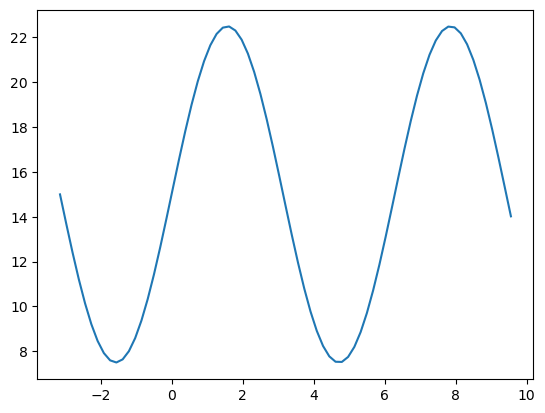

In [ ]:
#x=np.linspace(-np.pi, np.pi, len(73))
no_of_days = len(idx)/24
print(no_of_days)
multiplier=(no_of_days*2)-1 # 2 pi is one cycle. -1 to make it a full cycle 
x =x = np.linspace(-np.pi, no_of_days*np.pi, len(idx))
admission_means = (np.sin(x) * (mean_admissions/2)) + mean_admissions

import matplotlib.pylab as plt
plt.plot(x, admission_means)

# means that will pass into the poisson distribution. -->sin wave

In [ ]:
df=pd.DataFrame(index=idx, data=rng.poisson(lam=admission_means, size=len(idx)), columns=['admissions'])
df.head()

,admissions
2023-01-01 00:00:00,20
2023-01-01 01:00:00,13
2023-01-01 02:00:00,11
2023-01-01 03:00:00,13
2023-01-01 04:00:00,10


<Axes: xlabel='None', ylabel='admissions'>

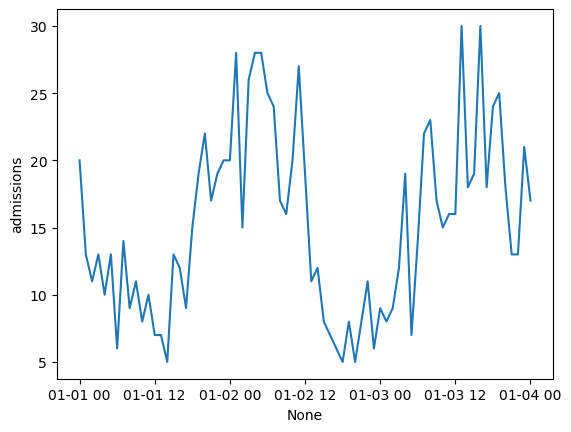

In [ ]:
sns.lineplot(data=df, x=df.index, y='admissions')